<a href="https://colab.research.google.com/github/Nath188/Redes-Neuronales/blob/main/Clasificacion_binaria_Overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importamos librerías

In [1]:
from keras.datasets import imdb
from keras import models, layers, optimizers
import numpy as np


## Descargamos los datos de imdb - Keras

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Función de one-hot encoding

In [3]:
def vectorizar(sequences, dim=10000):
    restults = np.zeros((len(sequences),dim))
    for i, sequences in enumerate(sequences):
        restults[i,sequences]=1
    return restults

## Transformamos datos

In [4]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [5]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Red neuronal original

In [6]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train =  y_train[10000:]

## Entrenando

In [9]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - acc: 0.6825 - loss: 0.6002 - val_acc: 0.8559 - val_loss: 0.4033
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - acc: 0.8881 - loss: 0.3439 - val_acc: 0.8754 - val_loss: 0.3252
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - acc: 0.9221 - loss: 0.2456 - val_acc: 0.8757 - val_loss: 0.3029
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - acc: 0.9409 - loss: 0.1955 - val_acc: 0.8903 - val_loss: 0.2744
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - acc: 0.9524 - loss: 0.1625 - val_acc: 0.8897 - val_loss: 0.2744
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.9589 - loss: 0.1354 - val_acc: 0.8849 - val_loss: 0.2926
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.9630 - loss: 0.1207 - val_acc: 0.8738 - val_loss: 0.3168
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.9708 - loss: 0.1040 - val_acc: 0.8830 - val_loss: 0.3043
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - acc: 0.9761

### Comparando un modelo más pequeño

In [10]:
model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [13]:
model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [12]:
history2 = model2.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - acc: 0.5806 - loss: 0.6617 - val_acc: 0.6748 - val_loss: 0.5846
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - acc: 0.7551 - loss: 0.5586 - val_acc: 0.7693 - val_loss: 0.5352
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - acc: 0.8317 - loss: 0.5054 - val_acc: 0.8136 - val_loss: 0.5035
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - acc: 0.8670 - loss: 0.4698 - val_acc: 0.8301 - val_loss: 0.4823
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - acc: 0.8923 - loss: 0.4372 - val_acc: 0.8495 - val_loss: 0.4644
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - acc: 0.9136 - loss: 0.4065 - val_acc: 0.8684 - val_loss: 0.4479
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.9259 - loss: 0.3912 - val_acc: 0.8710 - val_loss: 0.4367
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.9384 - loss: 0.3661 - val_acc: 0.8828 - val_loss: 0.4198
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - acc: 0.9491

## Analizamos resultados

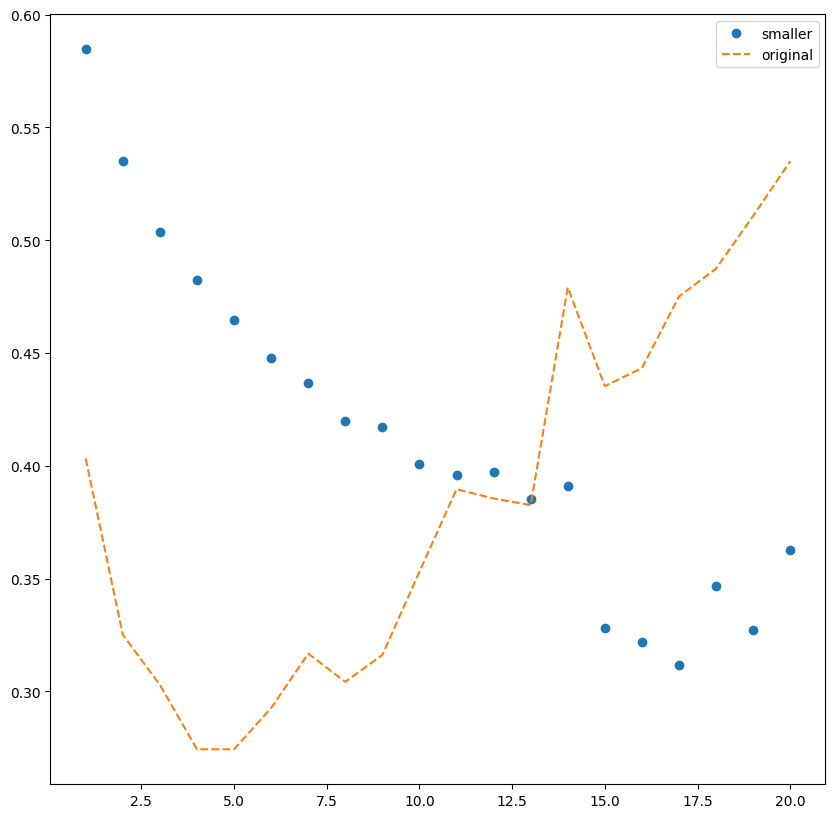

In [14]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

val_loss_values2 = history2.history['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values2, 'o',label='smaller')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()

## Regularización

In [15]:
from keras import regularizers

In [16]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,),kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation='sigmoid'))

In [17]:
model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [18]:
history3 = model3.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - acc: 0.6857 - loss: 0.6553 - val_acc: 0.8516 - val_loss: 0.4552
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.8914 - loss: 0.3939 - val_acc: 0.8676 - val_loss: 0.3814
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.9186 - loss: 0.3087 - val_acc: 0.8889 - val_loss: 0.3355
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.9298 - loss: 0.2657 - val_acc: 0.8888 - val_loss: 0.3250
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - acc: 0.9412 - loss: 0.2318 - val_acc: 0.8839 - val_loss: 0.3363
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - acc: 0.9519 - loss: 0.2095 - val_acc: 0.8855 - val_loss: 0.3270
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.9580 - loss: 0.1954 - val_acc: 0.8834 - val_loss: 0.3365
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.9602 - loss: 0.1843 - val_acc: 0.8839 - val_loss: 0.3427
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - acc: 0.9669

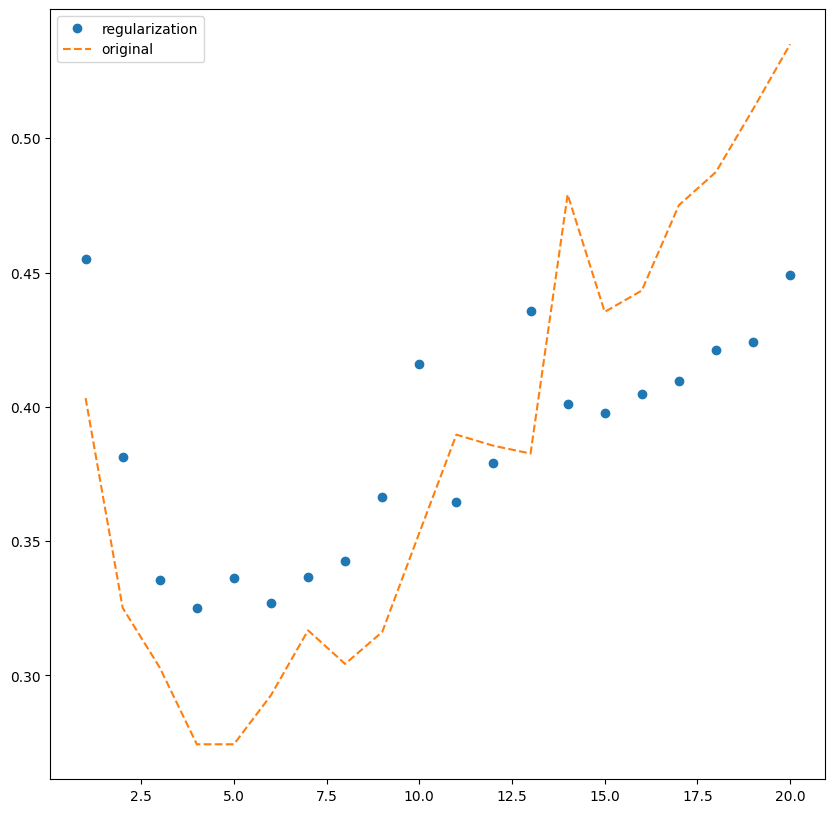

In [19]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

val_loss_values3 = history3.history['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values3, 'o',label='regularization')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()

### Dropout

In [20]:
model4 = models.Sequential()
model4.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(16, activation='relu'))
model4.add(layers.Dropout(0.5))
model4.add(layers.Dense(1, activation='sigmoid'))

In [21]:
model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
             metrics=['acc'])

In [22]:
history4 = model4.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - acc: 0.5772 - loss: 0.6693 - val_acc: 0.8225 - val_loss: 0.5279
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - acc: 0.7510 - loss: 0.5480 - val_acc: 0.8316 - val_loss: 0.4427
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - acc: 0.8138 - loss: 0.4591 - val_acc: 0.8482 - val_loss: 0.3806
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - acc: 0.8503 - loss: 0.3930 - val_acc: 0.8815 - val_loss: 0.3193
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - acc: 0.8818 - loss: 0.3331 - val_acc: 0.8861 - val_loss: 0.2918
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - acc: 0.9054 - loss: 0.2869 - val_acc: 0.8848 - val_loss: 0.2980
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - acc: 0.9147 - loss: 0.2632 - val_acc: 0.8840 - val_loss: 0.2805
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - acc: 0.9250 - loss: 0.2318 - val_acc: 0.8848 - val_loss: 0.2824
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - acc: 0.9336

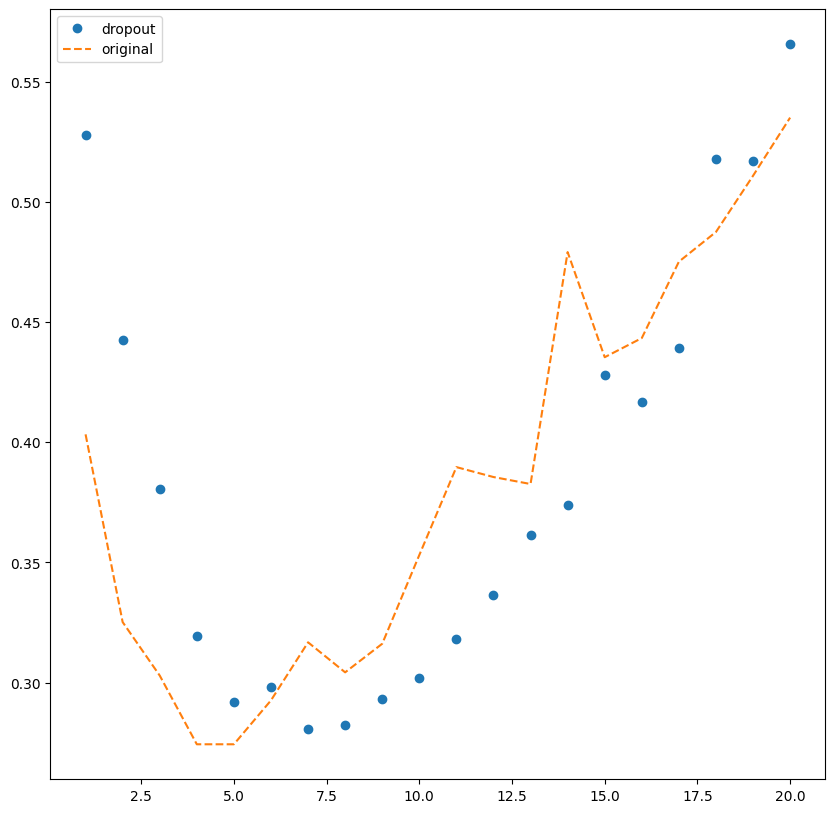

In [23]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

val_loss_values4 = history4.history['val_loss']


fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,val_loss_values4, 'o',label='dropout')
plt.plot(epoch,val_loss_values, '--',label='original')
plt.legend()
plt.show()